<a href="https://colab.research.google.com/github/shahad-jeza/ML_and_DL_practice/blob/main/ML_book_ch3_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prepare minsit dataset using  sikit learn
# train a classifer
# evalaute using accurace,persion,recall, confusion matrix ... interupt the results
# use K fold cross val

In [ ]:
from sklearn import datasets, metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV

In [ ]:
data = fetch_openml('mnist_784', version=1)

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = data['data'], data['target']

In [ ]:
print(data['target_names'])

['class']


In [ ]:
X.shape

(70000, 784)

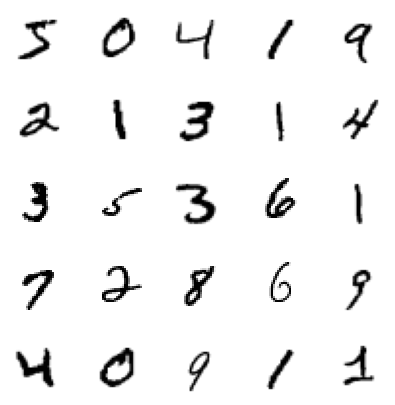

In [ ]:
#plot some samples from the data
axes = []
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.5)
for i in range(25):
    axes.append(fig.add_subplot(5,5,i+1))
    axes[-1].imshow(X.iloc[i].values.reshape(28,28),cmap=mpl.cm.binary)
    axes[-1].axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# train the k-neighbor but use grid search to find best hyper paramters
model = KNeighborsClassifier()
param_grid = [{'weights':['uniform','distance'],'n_neighbors':[3,4,5]}]
grid_search = GridSearchCV(model,param_grid,cv=5,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  39.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  41.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  42.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  33.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  34.6s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  39.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  34.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  33.6s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  37.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  35.4s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
#evalute the model
y_pred = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


0.9731428571428572
[[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    0    0    4    0    1]
 [   7   14 1327    1    2    1    6   16    3    3]
 [   0    2   11 1384    1   11    1    9    6    8]
 [   2    6    1    0 1254    0    2    3    1   26]
 [   0    5    0   12    2 1240   10    0    2    2]
 [   4    0    0    0    4    4 1383    0    1    0]
 [   1   16    3    1    3    0    0 1467    1   11]
 [   2   12    3   19    1   17    5    8 1276   14]
 [   4    4    2    9   19    0    0   16    1 1365]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7     

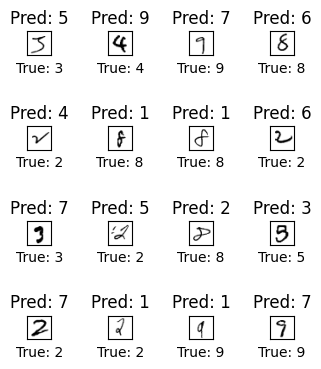

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

axes = []
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(hspace=3)

# Ensure the number of elements in y_pred and y_test is sufficient.
# Limit the number of images to be displayed to 16
num_images = 16
misclassified_count = 0

for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:  # Plot only misclassified images
        if misclassified_count < num_images:
            axes.append(fig.add_subplot(4, 4, misclassified_count + 1))
            reshaped_img = X_test.iloc[i].values.reshape(28, 28)  # Ensure correct reshaping
            # Hide ticks, but keep the labels
            axes[-1].set_xticks([])
            axes[-1].set_yticks([])
            axes[-1].imshow(reshaped_img, cmap=mpl.cm.binary)
            axes[-1].set_title(f'Pred: {y_pred[i]}')
            axes[-1].set_xlabel(f'True: {y_test.iloc[i]}')
            misclassified_count += 1  # Increment count only if plotted
        else:
            break  # Exit the loop once 16 images are plotted

plt.show()